In [52]:
import pandas as pd
import matplotlib.pyplot as plt

import itertools

asset_classes = ['SPY', 'GC=F', '^TNX', '^VIX', 'CL']

dfs = []
for asset_class in asset_classes:
    filename = f'{asset_class}.csv'
    df = pd.read_csv(filename, usecols=['Date', 'Close'], parse_dates=['Date'], dayfirst=True)
    df = df.rename(columns={'Close': f'{asset_class}'})
    dfs.append(df)

# Merge dfs on Date column
merged_df = dfs[0]
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on='Date', how='inner')

merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%d-%m-%Y')
merged_df.to_csv('Merged Close.csv', index=False)

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

import itertools

asset_classes = ['SPY', 'GC=F no dash', '^TNX', '^VIX', 'CL']

dfs = []
for asset_class in asset_classes:
    filename = f'{asset_class}.csv'
    df = pd.read_csv(filename, usecols=['Date', 'Volume'], parse_dates=['Date'], dayfirst=True)
    df = df.rename(columns={'Volume': f'{asset_class}'})
    dfs.append(df)

# Merge dfs on Date column
merged_df = dfs[0]
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on='Date', how='inner')

merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%d-%m-%Y')
merged_df.to_csv('Merged Volume.csv', index=False)

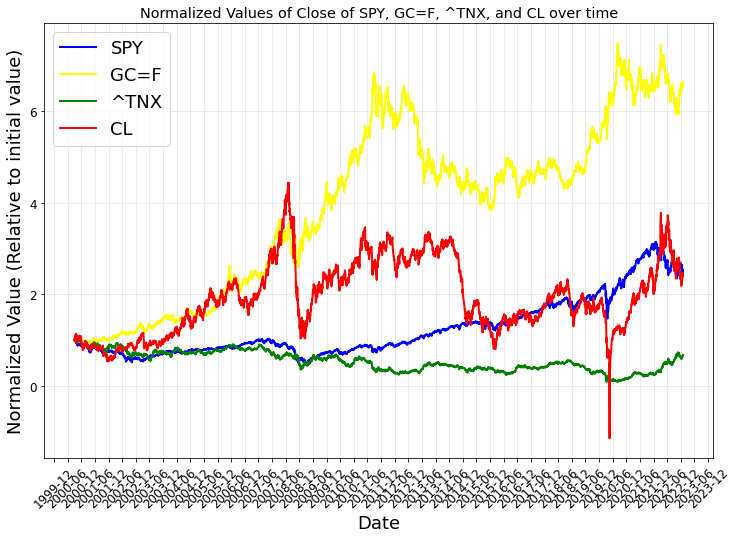

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.dates import MonthLocator, DateFormatter

# Load merged data
merged_df = pd.read_csv('Merged Close.csv', parse_dates=['Date'], dayfirst=True)

# Normalize data
normalized_df = merged_df.copy()
for col in normalized_df.columns[1:]:
    normalized_df[col] = pd.to_numeric(normalized_df[col], errors='raise')
    normalized_df[col] = normalized_df[col] / normalized_df[col][0]

# Set x and y values
x = normalized_df['Date']
SPY_values = normalized_df['SPY']
GC_values = normalized_df['GC=F']
TNX_values = normalized_df['^TNX']
CL_values = normalized_df['CL']

# Increase plot size and font sizes
mpl.rcParams['figure.figsize'] = [12.0, 8.0]
mpl.rcParams['font.size'] = 12.0
mpl.rcParams['axes.labelsize'] = 18.0
mpl.rcParams['legend.fontsize'] = 18.0

# Create plot with thicker lines and distinct colors
plt.plot(x, SPY_values, linewidth=2, color='blue')
plt.plot(x, GC_values, linewidth=2, color='yellow')
plt.plot(x, TNX_values, linewidth=2, color='green')
plt.plot(x, CL_values, linewidth=2, color='red')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Normalized Value (Relative to initial value)')
plt.title('Normalized Values of Close of SPY, GC=F, ^TNX, and CL over time')
plt.legend(['SPY', 'GC=F', '^TNX', 'CL'], loc='upper left')

# Set the x-axis ticks at a regular interval of six months and tilt them by 45 degrees
months = MonthLocator(interval=6)
date_format = DateFormatter('%Y-%m')
ax = plt.gca()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

# Add a grid
plt.grid(alpha=0.3)

# Show plot
plt.show()


**Findings**

The normalised close values of the five asset classes were visualised, and it was observed that gold futures provided the highest returns. However, during the period 2012-2017, investing in SPY (stocks) or in 2006-2007 investing in CL (Crude Oil) would have been more profitable. Therefore, a combination of these five asset classes invested at the right time could be most advantageous.

In [30]:
import datetime as dt
from datetime import timedelta as td
import pandas as pd
import numpy as np 
from datetime import date

def DRAWDOWN_DURATION(name, starttime, endtime):
    df = pd.read_csv(name+".csv")
    start_date = pd.to_datetime(starttime)
    end_date = pd.to_datetime(endtime)   
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True) 
    new_df = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    
    df1 = df.loc[new_df]
    stock_data = df1.set_index('Date')    

    prevmaxdate = stock_data.index[0]
    maxnumberofdays = 0
    startdate = prevmaxdate
    enddate = prevmaxdate
    maxclose = float('-inf')

    for i in range(len(stock_data)):
        date = stock_data.index[i]
        close = stock_data.iloc[i]['Adj Close']
        if close > maxclose:
            maxclose = close
            prevmaxdate = date
        else:
            daysdiff = (date - prevmaxdate).days
            if daysdiff > maxnumberofdays:
                maxnumberofdays = daysdiff
                startdate = prevmaxdate
                enddate = date

    return startdate, enddate, maxnumberofdays


**Findings**
  
To determine the right time for investment, the maximum drawdown duration was calculated, which represents the maximum time taken by an asset to recover its price. The findings showed that this duration was quite long, i.e., 6+ years, depending on the asset. This indicated that investing involved considerable risk, and if invested at the wrong time, it could lead to long unprofitable periods.

Also, the maximum drawdown (calculated here as the maximum fall in the stock price over a period of 252 trading days (365 days)), generally occured during recession periods (recession periods marked in blue)

In [31]:
def DRAWDOWN_PERCENT(name, starttime, endtime):
    df = pd.read_csv(name + ".csv")
    start_date = pd.to_datetime(starttime, dayfirst=True)
    end_date = pd.to_datetime(endtime, dayfirst=True)
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    new_df = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    df1 = df.loc[new_df]
    stock_data = df1.reset_index(drop=True)

    window_size = 252
    max_drawdown = 0
    max_drawdown_start = None
    max_drawdown_end = None

    for i in range(len(stock_data) - window_size):
        current_window = stock_data.iloc[i:i + window_size]
        current_peak_idx = current_window['Adj Close'].idxmax()
        current_peak_value = current_window.loc[current_peak_idx, 'Adj Close']
        current_trough_idx = current_window.loc[current_peak_idx:]['Adj Close'].idxmin()
        current_trough_value = current_window.loc[current_trough_idx, 'Adj Close']

        drawdown = (current_peak_value - current_trough_value) / current_peak_value

        if drawdown > max_drawdown:
            max_drawdown = drawdown
            max_drawdown_start = stock_data.loc[current_peak_idx, 'Date']
            max_drawdown_end = stock_data.loc[current_trough_idx, 'Date']

    return max_drawdown_start, max_drawdown_end, max_drawdown * 100


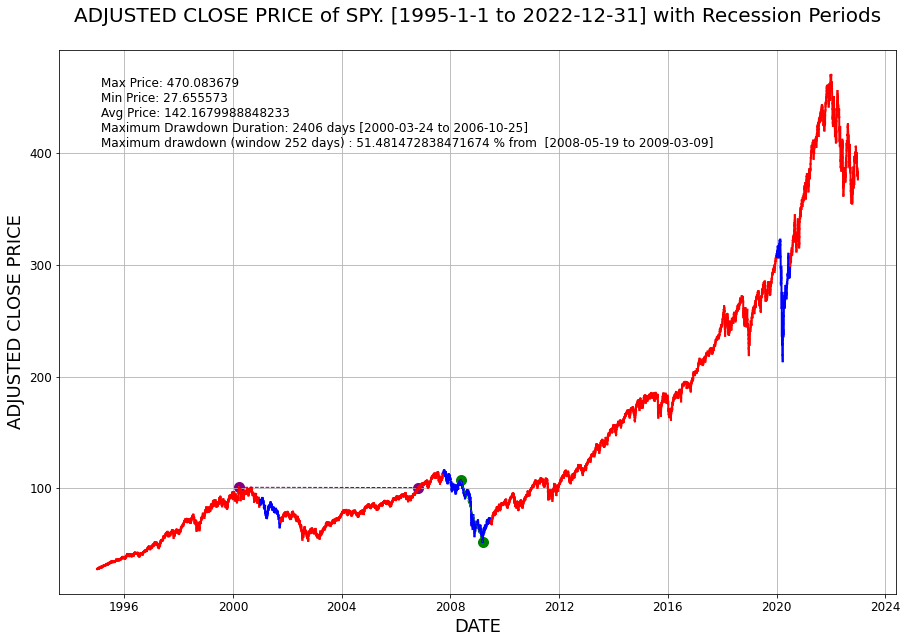

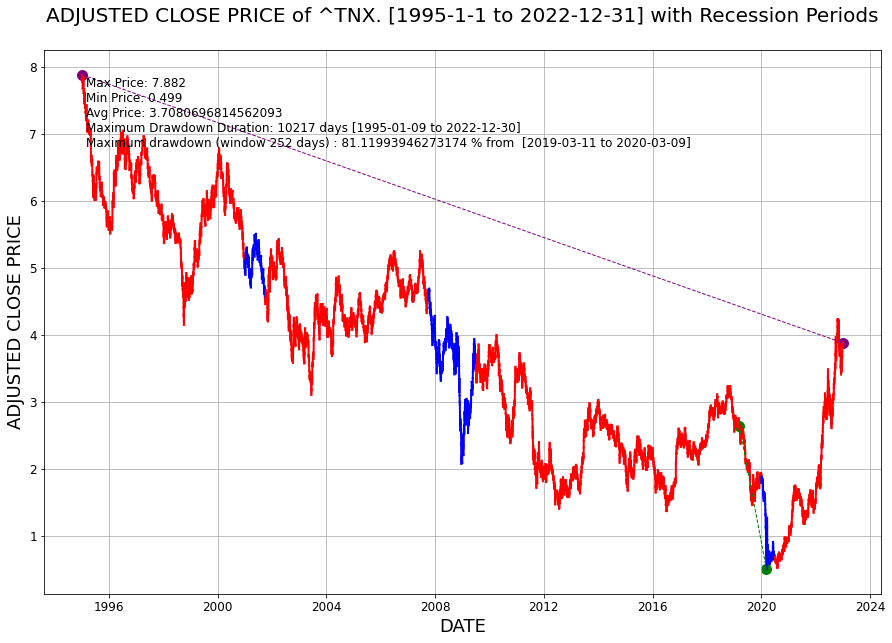

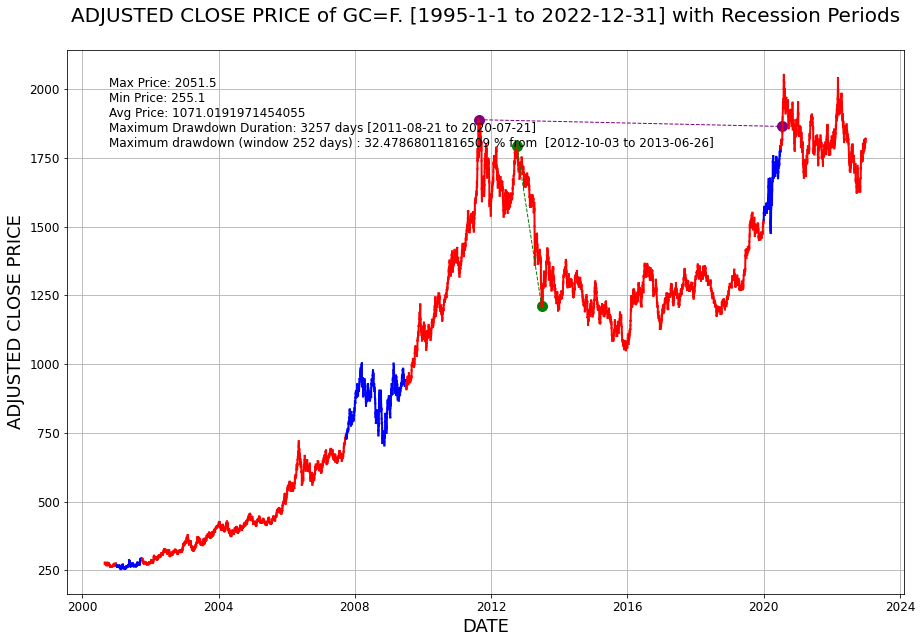

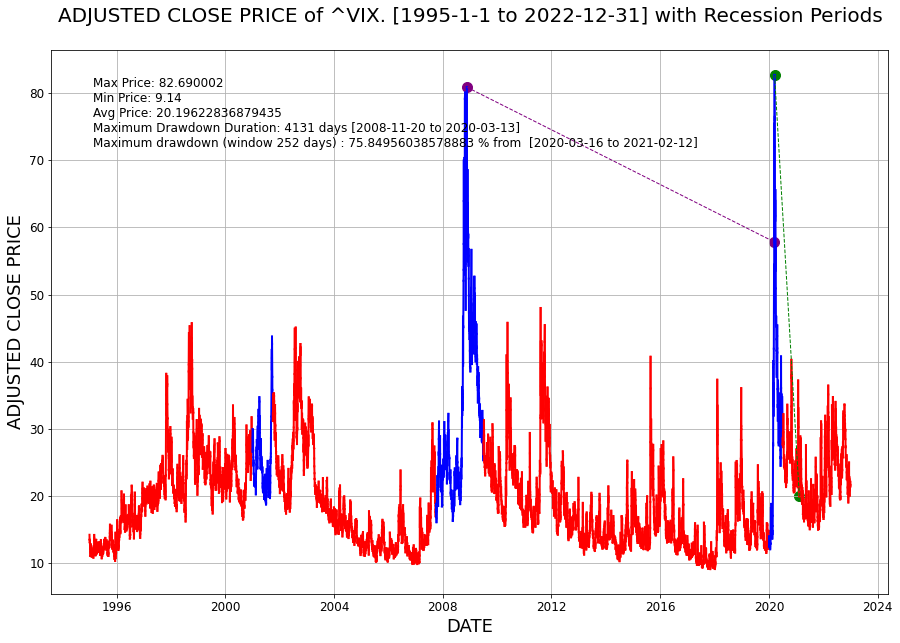

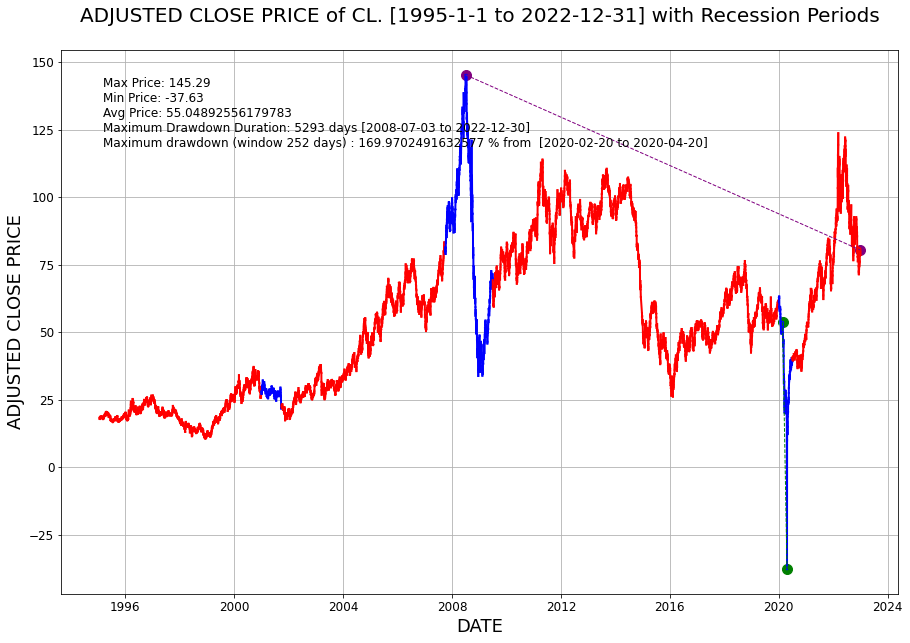

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from itertools import accumulate


def plotDataWithRecessionAndStats(name, starttime, endtime):
    stock_df = pd.read_csv(name + ".csv")
    recession_df = pd.read_csv("recession.csv")

    start_date = pd.to_datetime(starttime)
    end_date = pd.to_datetime(endtime)

    stock_df['Date'] = pd.to_datetime(stock_df['Date'], dayfirst=True)
    recession_df['Date'] = pd.to_datetime(recession_df['Date'], dayfirst=True)

    stock_filtered = (stock_df['Date'] >= start_date) & (stock_df['Date'] <= end_date)
    stock_data = stock_df.loc[stock_filtered].set_index('Date')
    recession_data = recession_df.set_index('Date').resample('D').ffill().loc[start_date:end_date]

    fig, ax = plt.subplots(figsize=(15, 10))
    date1, date2, days = DRAWDOWN_DURATION(name, starttime, endtime)
    date3, date4, ddpercent = DRAWDOWN_PERCENT(name, starttime, endtime)
    ax.set_xlabel('DATE', fontsize=18)

    ax.set_ylabel('ADJUSTED CLOSE PRICE', fontsize=18)

    for (i, row1), (_, row2) in zip(stock_data.iterrows(), stock_data.iloc[1:].iterrows()):
        color = 'blue' if recession_data.loc[row1.name, 'JHDUSRGDPBR'] else 'red'
        ax.plot([row1.name, row2.name], [row1['Adj Close'], row2['Adj Close']], color=color, linewidth=2)

    plt.title(f'ADJUSTED CLOSE PRICE of {name}. [{starttime} to {endtime}] with Recession Periods\n', fontsize=20, color='black')
    ax.grid(True)

    max_price = stock_data['Adj Close'].max()
    min_price = stock_data['Adj Close'].min()
    avg_price = stock_data['Adj Close'].mean()
    text = "Max Price: " + str(max_price) + "\nMin Price: " + str(min_price) + "\nAvg Price: " + str(
        avg_price) + f"\nMaximum Drawdown Duration: {days} days [{date1.date()} to {date2.date()}]" + f"\nMaximum drawdown (window 252 days) : {ddpercent} % from  [{date3.date()} to {date4.date()}] "

    plt.text(0.05, 0.95, text,
             transform=ax.transAxes, ha='left', va='top', fontsize=12, color='black')

    # Marking the maximum drawdown points
    ax.scatter([date3, date4], [stock_data.loc[date3, 'Adj Close'], stock_data.loc[date4, 'Adj Close']], color='green', marker='o', s=100)

    # Draw a line connecting the two maximum drawdown points
    ax.plot([date3, date4], [stock_data.loc[date3, 'Adj Close'], stock_data.loc[date4, 'Adj Close']], color='green', linestyle='--', linewidth=1)

    # Marking the maximum drawdown duration points
    ax.scatter([date1, date2], [stock_data.loc[date1, 'Adj Close'], stock_data.loc[date2, 'Adj Close']], color='purple', marker='o', s=100)

    # Draw a line connecting the maximum drawdown duration points
    ax.plot([date1, date2], [stock_data.loc[date1, 'Adj Close'], stock_data.loc[date2, 'Adj Close']], color='purple', linestyle='--', linewidth=1)    
    plt.show()




plotDataWithRecessionAndStats("SPY",'1995-1-1','2022-12-31')
plotDataWithRecessionAndStats("^TNX",'1995-1-1','2022-12-31')
plotDataWithRecessionAndStats("GC=F",'1995-1-1','2022-12-31')
plotDataWithRecessionAndStats("^VIX",'1995-1-1','2022-12-31')
plotDataWithRecessionAndStats("CL",'1995-1-1','2022-12-31')


**Findings**

Furthermore, correlation matrices were plotted between different continuous periods of recession and non-recession, revealing a strong relationship between these asset classes. The correlation coefficients were mostly highly positive or negative (i.e., around 0.5-0.9 or the same in the negative), indicating a potential for developing a model to predict the movement of a particular asset class based on the others.

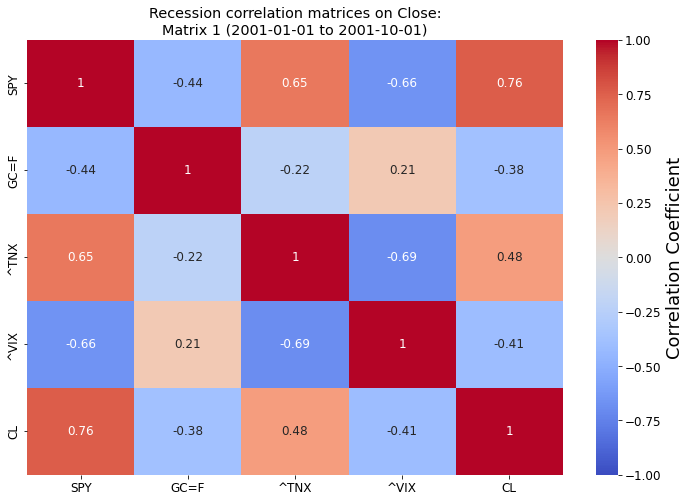

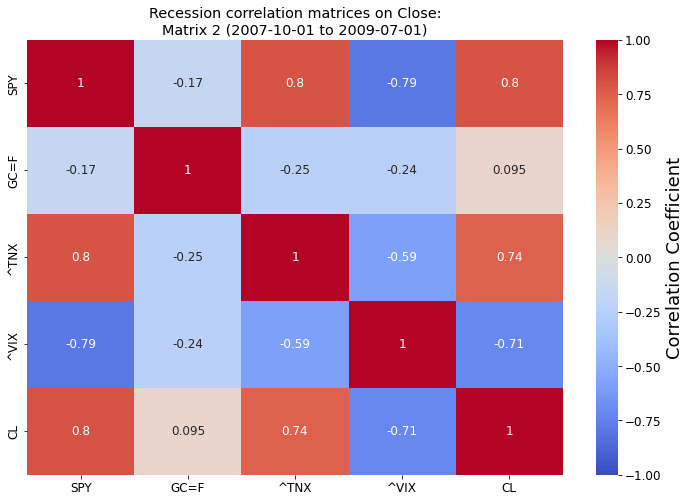

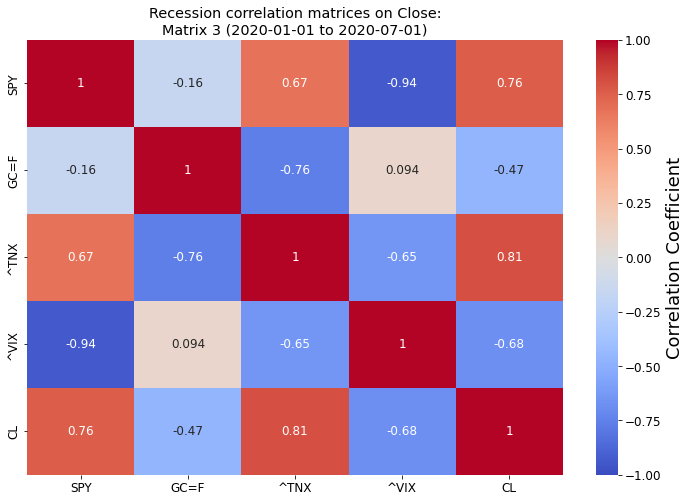

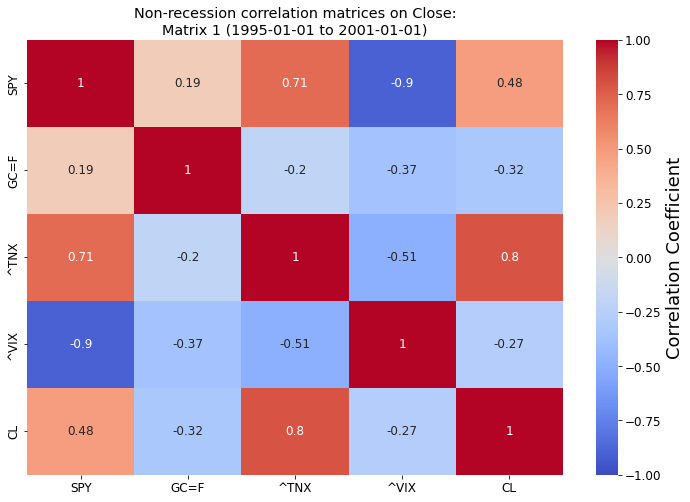

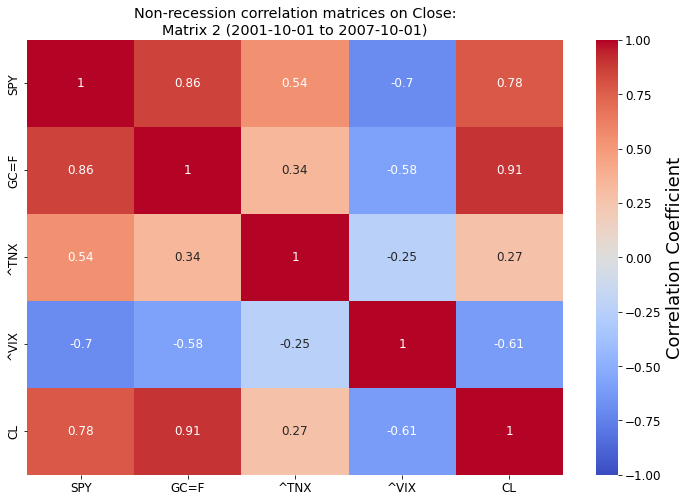

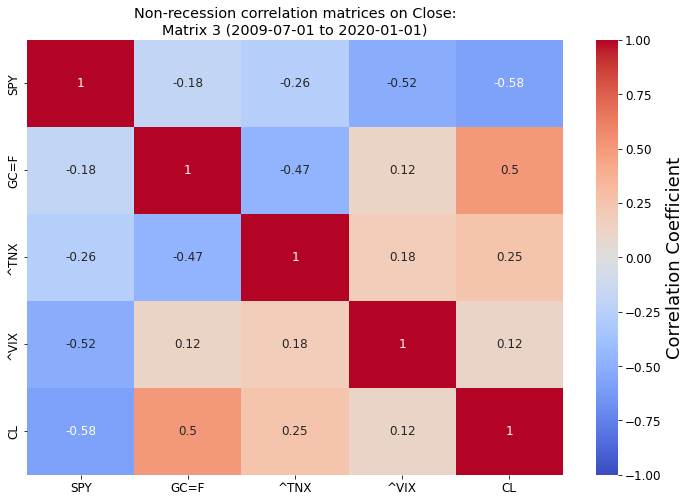

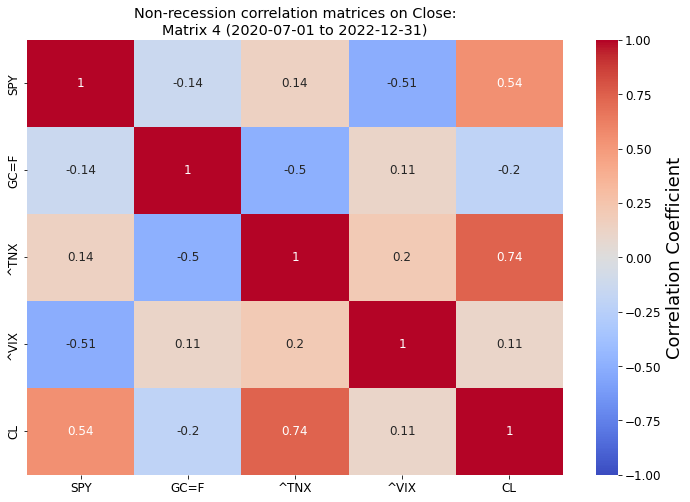

In [34]:
import pandas as pd
import numpy as np

def load_data(asset_name, start_date, end_date):
    data = pd.read_csv("Merged Close.csv")
    data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
    data = data.set_index('Date')
    return data.loc[start_date:end_date]

def get_recession_periods(recession_df):
    recession_periods = []
    non_recession_periods = []

    start_period = recession_df.index[0]
    current_recession = recession_df.iloc[0]['JHDUSRGDPBR']

    for date, row in recession_df.iterrows():
        if row['JHDUSRGDPBR'] != current_recession:
            if current_recession:
                recession_periods.append((start_period, date))
            else:
                non_recession_periods.append((start_period, date))
            start_period = date
            current_recession = row['JHDUSRGDPBR']

    if current_recession:
        recession_periods.append((start_period, date))
    else:
        non_recession_periods.append((start_period, date))

    return recession_periods, non_recession_periods

def calculate_correlations(asset_data, periods):
    correlations = []
    for start_date, end_date in periods:
        period_data = asset_data.loc[start_date:end_date].dropna()
        correlations.append(period_data.corr())
    return correlations

start_date = '1995-01-01'
end_date = '2022-12-31'

merged_data = load_data("Merged_Close", start_date, end_date)

recession_df = pd.read_csv("recession.csv")
recession_df['Date'] = pd.to_datetime(recession_df['Date'], dayfirst=True)
recession_df = recession_df.set_index('Date').resample('D').ffill().loc[start_date:end_date]

recession_periods, non_recession_periods = get_recession_periods(recession_df)

recession_correlations = calculate_correlations(merged_data, recession_periods)
non_recession_correlations = calculate_correlations(merged_data, non_recession_periods)

import seaborn as sns
#for heatmap visualisation
import matplotlib.pyplot as plt

def plot_correlation_matrices(matrices, periods, title):
    for i, (corr_matrix, period) in enumerate(zip(matrices, periods)):
        start_date, end_date = period
        plt.figure()
        ax = sns.heatmap(corr_matrix.round(4), annot=True, cmap="coolwarm", vmin=-1, vmax=1, cbar_kws={'label': 'Correlation Coefficient'})
        ax.set_title(f"{title}\nMatrix {i + 1} ({start_date.date()} to {end_date.date()})")
        plt.show()

plot_correlation_matrices(recession_correlations, recession_periods, "Recession correlation matrices on Close:")
plot_correlation_matrices(non_recession_correlations, non_recession_periods, "Non-recession correlation matrices on Close:")


